In [36]:
# import qiskit tools
import qiskit
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ
from qiskit import BasicAer
from qiskit.tools import job_monitor
from qiskit.tools.visualization import circuit_drawer, plot_histogram

# import python libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# no warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# save IBMQ token to disk; only do once
#IBMQ.save_account("*****")

In [2]:
# load IBMQ account from disk
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

In [3]:
# choose backend 
bckend = provider.get_backend('ibmq_belem')

# Creating a maximally entangled state on 2 qubits

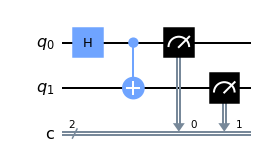

In [12]:
# define the circuit and print it

# quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# 2 gates, one Hadamard and one CNOT (CX)
qc.h(0)
qc.cx(0, 1)

# measure qubits 0,1 and store results in cbits 0,1
qc.measure([0,1], [0,1])

# draw the circuit
qc.draw(output='mpl')

In [13]:
# run the circuit and wait for results
job = execute(qc, bckend)

job_monitor(job)

Job Status: job has successfully run


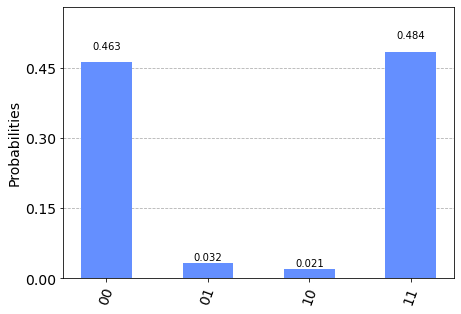

In [14]:
plot_histogram(job.result().get_counts())

# Creating a GHZ state

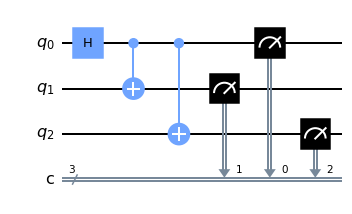

In [16]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

In [17]:
job = execute(qc, bckend)
job_monitor(job)

Job Status: job has successfully run


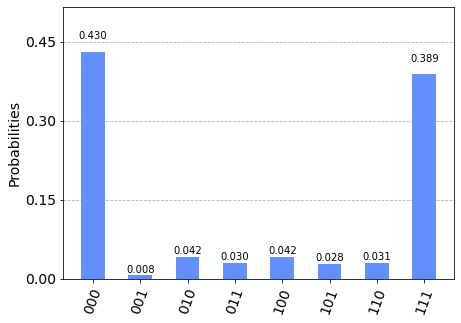

In [18]:
plot_histogram(job.result().get_counts())

# Creating a W state

In [ ]:
# TODO: add your qiskit code here

# Random pure states

In [25]:
# to create a random pure state, sample a uniform point on the unit sphere of the complex vector space 

# Hilbert space dimension
d = 5;

# start with a complex Gaussian random vector
g = (np.random.randn(d, 1) + 1.0j*np.random.randn(d, 1))/math.sqrt(2);

# normalize it
psi = g / np.linalg.norm(g);

print(psi)

[[-0.00539937+0.21423053j]
 [ 0.59020537+0.29268547j]
 [-0.04133309+0.51162898j]
 [-0.01627194-0.45929453j]
 [ 0.2015587 -0.06895055j]]


# Schmidt coefficients of (large) random pure states

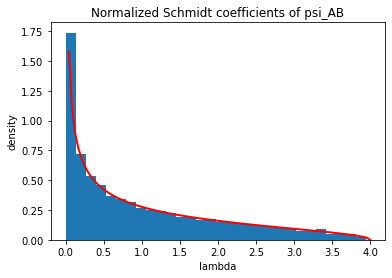

In [50]:
d = 600;

# consider a random bipartite state of dimensions d_A = d_B = d
g = (np.random.randn(d**2, 1) + 1.0j*np.random.randn(d**2, 1))/math.sqrt(2);
psi_AB = g / np.linalg.norm(g);

# compute the reduced density matrix rho_A
psi_hat = np.asmatrix(psi_AB.reshape((d, d)));
rho_A = psi_hat @ psi_hat.H

# plot the eigenvalues of rho_A, which are also the Schmidt coefficients of psi_AB 
eigs = d * np.linalg.eigvalsh(rho_A)

plt.hist(eigs,30, density=1)
plt.title("Normalized Schmidt coefficients of psi_AB")
plt.xlabel("lambda")
plt.ylabel("density")
x = np.linspace(0,4,100)
y = np.sqrt((4-x)*x)/(2*np.pi*x)
plt.plot(x,y, linewidth=2.0, color='r')

plt.show()